In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn

from pandas.io.data import DataReader
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import random
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn import cross_validation
from scipy.stats import spearmanr 
import xgboost as xgb
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 a

In [89]:
df = pd.read_csv('../output/dat_prediction 3.csv', index_col=0)

In [124]:
def dataselection(model, m=4):
    model = model.iloc[:,1:]
    
    X = np.array(model)[:,1:] 
    Y = np.array(model)[:,0] 
    
    n = len(model)
    
    X_test = X[:(n + 1) /m]
    Y_test = Y[:(n + 1) /m]
    X_train = X[(n + 1) /m:]
    Y_train = Y[(n + 1) /m:]
    return X_train, Y_train, X_test, Y_test, X, Y

X_train, Y_train, X_test, Y_test, X, Y = dataselection(df, m=4)

def classificationevaluation(Y_test, Y_pred):
    print '======================================'
    n = len(Y_test)
    print 'ar is: ', accuracy_score(list(Y_test), list(Y_pred))
    print 'er is: ', 1-accuracy_score(list(Y_test), list(Y_pred))
    diff = list(Y_test - Y_pred)

    print 'Type I error rate: ',  diff.count(1)/(n+0.0)
    print 'Type II error rate: ', diff.count(-1)/(n+0.0)

In [26]:
#RF
def randomforest():
    print "**************************************"
    tuned_parameters = {"max_depth": [7,9,11, None],
              "max_features": ['auto','sqrt','log2',None]}
    
    clf = RandomForestClassifier(n_estimators = 100)
    
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = RandomForestClassifier(**gs.best_params_)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'Random Forest'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [27]:
randomforest()

**************************************
Best parameters set found on development set:
{'max_features': 'log2', 'max_depth': 7}
Random Forest
ar is:  0.605633802817
er is:  0.394366197183
Type I error rate:  0.321931589537
Type II error rate:  0.0724346076459
adaboost
ar is:  0.567404426559
er is:  0.432595573441
Type I error rate:  0.319919517103
Type II error rate:  0.112676056338


In [28]:
#NB
def NB():
    print "**************************************"
    clf = GaussianNB()
    AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
                            
    clf = clf.fit(X_train, Y_train)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'NB'
    
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [29]:
NB()

**************************************
NB
ar is:  0.531187122736
er is:  0.468812877264
Type I error rate:  0.259557344064
Type II error rate:  0.209255533199
adaboost
ar is:  0.609657947686
er is:  0.390342052314
Type I error rate:  0.303822937626
Type II error rate:  0.0865191146881


In [30]:
#XGBoosting
def xgboostresult():
    print "**************************************"
    tuned_parameters = {"max_depth": [3,7,9,11],
                        'n_estimators': [100,200]}

    clf = xgb.XGBClassifier()
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = xgb.XGBClassifier(**gs.best_params_)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'XGBoost'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [31]:
xgboostresult()

**************************************
Best parameters set found on development set:
{'n_estimators': 100, 'max_depth': 7}
XGBoost
ar is:  0.561368209256
er is:  0.438631790744
Type I error rate:  0.30583501006
Type II error rate:  0.132796780684
adaboost
ar is:  0.623742454728
er is:  0.376257545272
Type I error rate:  0.376257545272
Type II error rate:  0.0


In [218]:
def KNN():
    print "**************************************"
    tuned_parameters = {"n_neighbors": [5,7,9,11],
              "algorithm": ['auto','ball_tree','kd_tree']}
    
    clf = KNeighborsClassifier(n_neighbors=7)
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = KNeighborsClassifier(**gs.best_params_)
    #clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    #clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'KNN'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    #classificationevaluation(Y_test, clfboost.predict(X_test))
    return y_pred, clf.predict_proba(X_test)

In [33]:
KNN()

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.583501006036
er is:  0.416498993964
Type I error rate:  0.323943661972
Type II error rate:  0.092555331992
adaboost


In [100]:
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df, m=4)

In [102]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, Y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False ..., False False False]
[568 130 199 ..., 591 687 698]


In [201]:
features = pd.DataFrame([])
features['feature'] = list(df.columns)[2:]
features['rank'] = rfe.ranking_

features[features['rank'] < 50]

,feature,rank
38,around,30
66,break,39
77,capit,45
93,cia,38
147,economi,31
150,elect,20
194,gas,46
259,jewish,21
297,march,43
301,massiv,42


In [202]:
#top feature seleciton I 
for i in range(10,65,5):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.551307847082
er is:  0.448692152918
Type I error rate:  0.297786720322
Type II error rate:  0.150905432596
adaboost
i is 10
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.281690140845
Type II error rate:  0.15291750503
adaboost
i is 15
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.581488933602
er is:  0.418511066398
Type I error rate:  0.255533199195
Type II error rate:  0.162977867203
adaboost
i is 20
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.571428571429
er is:  0.428571428571
Type I error rate:  0.27162977867

In [204]:
#top feature seleciton II
for i in range(15,25):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.281690140845
Type II error rate:  0.15291750503
adaboost
i is 15
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.565392354125
er is:  0.434607645875
Type I error rate:  0.27967806841
Type II error rate:  0.154929577465
adaboost
i is 16
**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.56338028169
er is:  0.43661971831
Type I error rate:  0.267605633803
Type II error rate:  0.169014084507
adaboost
i is 17
**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.543259557344
er is:  0.456740442656
Type I error rate:  0.263581488934
Typ

In [205]:
#top 22 features are selected

In [230]:
chosed_features = list(features[features['rank']<22]['feature'])
features_list = ['Date','Label.x']
features_list.extend(chosed_features)
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
y_pred, y_prob = KNN()
y_prob = [item[0] for item in y_prob]

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.585513078471
er is:  0.414486921529
Type I error rate:  0.263581488934
Type II error rate:  0.150905432596
adaboost


In [220]:
n = len(y_pred)
prediction_result = pd.DataFrame([])
prediction_result['Date'] = df['Date'].iloc[-n:]
prediction_result['ture'] = df['Label.x'].iloc[-n:]
prediction_result['prediction'] = y_pred

In [221]:
prediction_result.to_csv('../output/prediction_result.csv')
prediction_result

,Date,ture,prediction
1492,7/14/2014,0,0.0
1493,7/15/2014,1,1.0
1494,7/16/2014,0,1.0
1495,7/17/2014,1,0.0
1496,7/18/2014,0,0.0
1497,7/21/2014,1,1.0
1498,7/22/2014,1,1.0
1499,7/23/2014,1,0.0
1500,7/24/2014,0,0.0
1501,7/25/2014,0,0.0


In [243]:
#risk management: change the threshold for exploratory
for i in range(50,90,5):
    print '**************************************'
    print i/100.0
    classificationevaluation(Y_test, [int(item<(i/100.0)) for item in y_prob])

**************************************
0.5
ar is:  0.585513078471
er is:  0.414486921529
Type I error rate:  0.263581488934
Type II error rate:  0.150905432596
**************************************
0.55
ar is:  0.53722334004
er is:  0.46277665996
Type I error rate:  0.197183098592
Type II error rate:  0.265593561368
**************************************
0.6
ar is:  0.53722334004
er is:  0.46277665996
Type I error rate:  0.197183098592
Type II error rate:  0.265593561368
**************************************
0.65
ar is:  0.492957746479
er is:  0.507042253521
Type I error rate:  0.12676056338
Type II error rate:  0.380281690141
**************************************
0.7
ar is:  0.492957746479
er is:  0.507042253521
Type I error rate:  0.12676056338
Type II error rate:  0.380281690141
**************************************
0.75
ar is:  0.442655935614
er is:  0.557344064386
Type I error rate:  0.0643863179074
Type II error rate:  0.492957746479
**************************************
0.8

In [244]:
for i in range(5,50,5):
    print '**************************************'
    print i/100.0
    classificationevaluation(Y_test, [int(item<(i/100.0)) for item in y_prob])

**************************************
0.05
ar is:  0.623742454728
er is:  0.376257545272
Type I error rate:  0.376257545272
Type II error rate:  0.0
**************************************
0.1
ar is:  0.625754527163
er is:  0.374245472837
Type I error rate:  0.374245472837
Type II error rate:  0.0
**************************************
0.15
ar is:  0.625754527163
er is:  0.374245472837
Type I error rate:  0.374245472837
Type II error rate:  0.0
**************************************
0.2
ar is:  0.625754527163
er is:  0.374245472837
Type I error rate:  0.366197183099
Type II error rate:  0.00804828973843
**************************************
0.25
ar is:  0.625754527163
er is:  0.374245472837
Type I error rate:  0.366197183099
Type II error rate:  0.00804828973843
**************************************
0.3
ar is:  0.625754527163
er is:  0.374245472837
Type I error rate:  0.348088531187
Type II error rate:  0.0261569416499
**************************************
0.35
ar is:  0.62575452716

In [368]:
price = pd.read_csv('../data/DJIA_table.csv').iloc[1492:,][['Date','Close']]

In [369]:
date = list(price['Date'])

In [370]:
operation = list(y_prob)

In [371]:
price = list(price['Close'])

In [409]:
returns = np.log(holding[1:]) - np.log(holding[0:-1])
returns.var()

8.0791897085806132e-05

In [531]:
def thereshold(m, n, short = False):
    holding = range(len(operation))
    holding[0] = price[0] 
    if short == True:
        for i in range(1,len(operation)):
            if operation[i] < m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #long
            elif operation[i] > 1-n:
                holding[i] = holding[i-1] - (price[i] - price[i-1])  #short
            else:
                holding[i] = holding[i-1]
    else:
        for i in range(1,len(operation)):
            if operation[i] < m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #hold
            else:
                holding[i] = holding[i-1]
    plt.plot(price)
    plt.plot(holding)
    
    
    dji = np.log(price[1:]) - np.log(price[0:-1])
    returns = np.log(holding[1:]) - np.log(holding[0:-1])
    
    print 'Long Short Strategy'
    print 'sharp ratio of strategy is: ',returns.mean()/returns.var()
    print 'total returns of strategy is: ',np.log(holding[-1]) - np.log(holding[0])
    print 'sharp ratio of DJI is: ',dji.mean()/dji.var()
    
    return returns.mean()

In [495]:
# 0 represents price up

In [513]:
#To Do
#1. threshold for long only strategy
#2. threshold for short only strategy
#3. threshold for long short strategy

1 1
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 6
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 11
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 16
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 21
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 26
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 31
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
1 36
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy i

,1,6,11,16,21,26,31,36,41,46,51
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
16,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
21,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071
26,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071
31,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081
36,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081
41,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068,0.000068
46,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245


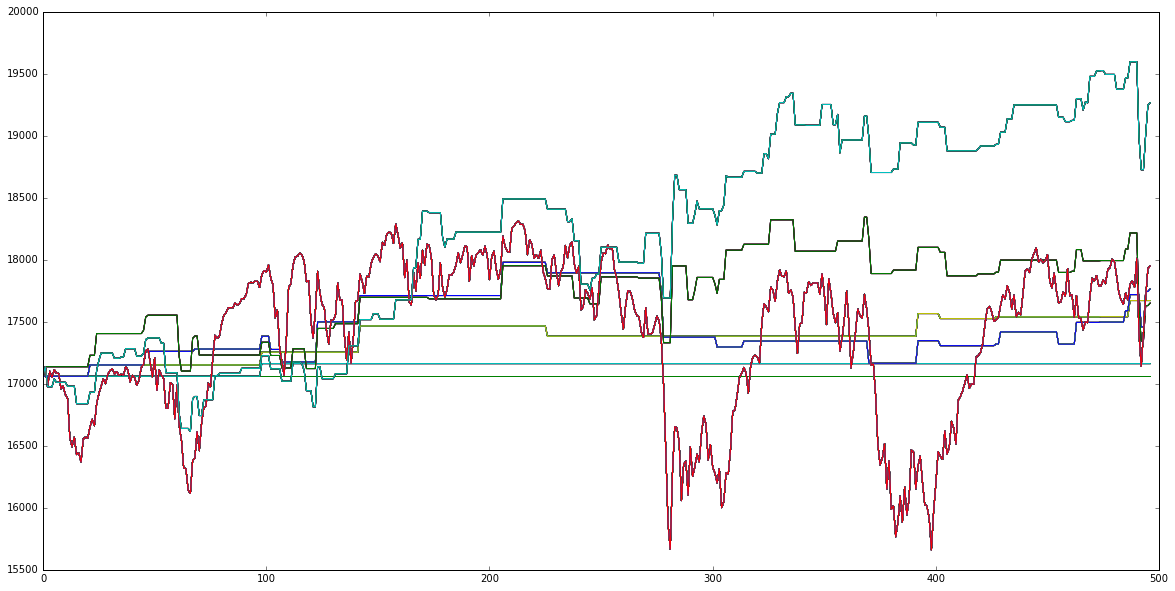

In [532]:
#1. threshold for long only strategy
optlist = pd.DataFrame(index = range(1,55,5), columns = range(1,55,5))
optlist = optlist.fillna(0) 
for i in range(1,55,5):
    for j in range(1,55,5):
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, False)

optlist

Long Short Strategy
sharp ratio of strategy is:  11.1539395507
total returns of strategy is:  0.121580808558
sharp ratio of DJI is:  1.20152627403


11.15393955068107

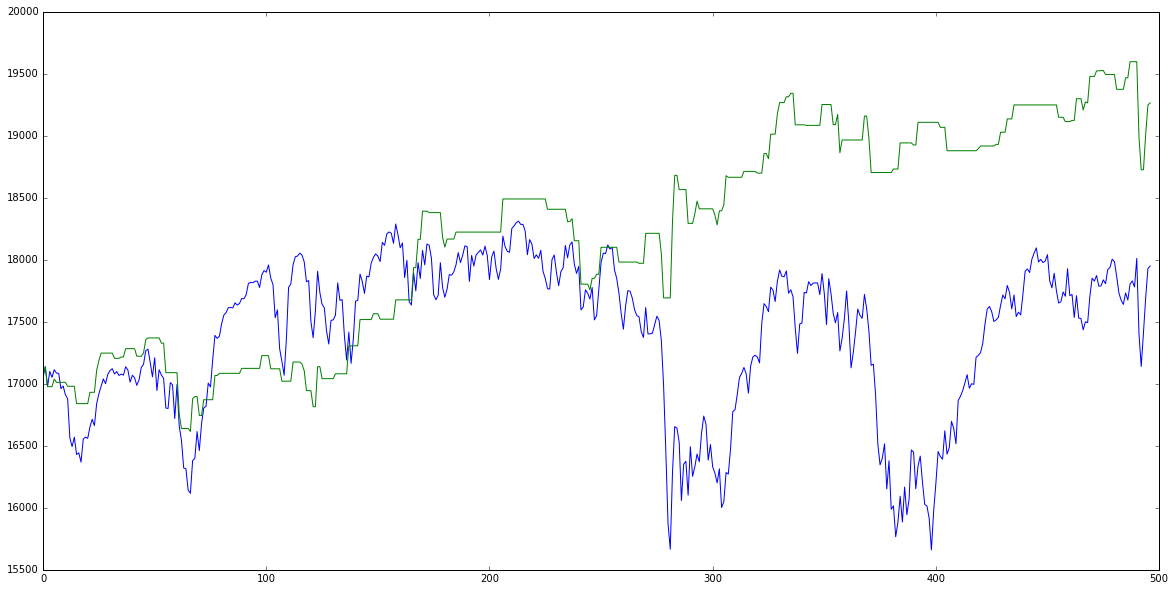

In [529]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, False)

Long Short Strategy
sharp ratio of strategy is:  16.8589091694
total returns of strategy is:  0.0403811734313
sharp ratio of DJI is:  1.20152627403


8.1413656111448037e-05

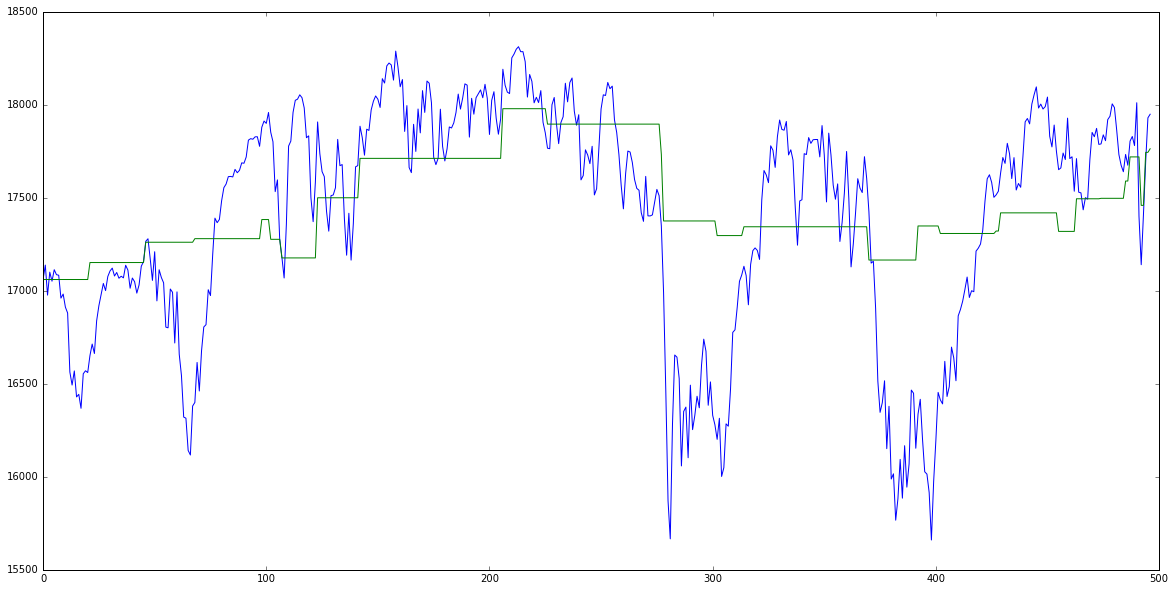

In [533]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(31/100.0, 31/100.0, False)

In [ ]:
#2. threshold for short only strategy
optlist = pd.DataFrame(index = range(1,55,5), columns = range(1,55,5))
optlist = optlist.fillna(0) 
for i in range(1,55,5):
    for j in range(1,55,5):
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, True)

0 0
Long Short Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  1.20152627403
0 5
Long Short Strategy
sharp ratio of strategy is:  16.1981340969
total returns of strategy is:  0.0314264274179
sharp ratio of DJI is:  1.20152627403
0 10
Long Short Strategy
sharp ratio of strategy is:  13.501618407
total returns of strategy is:  0.0532317004668
sharp ratio of DJI is:  1.20152627403
0 15
Long Short Strategy
sharp ratio of strategy is:  13.501618407
total returns of strategy is:  0.0532317004668
sharp ratio of DJI is:  1.20152627403
0 20
Long Short Strategy
sharp ratio of strategy is:  4.28938724672
total returns of strategy is:  0.0344079077318
sharp ratio of DJI is:  1.20152627403
0 25
Long Short Strategy
sharp ratio of strategy is:  4.28938724672
total returns of strategy is:  0.0344079077318
sharp ratio of DJI is:  1.20152627403
0 30
Long Short Strategy
sharp ratio of strategy is:  3.25055260243
total returns of strategy is:  0.0452260

,0,5,10,15,20,25,30,35,40,45,50
0,0.000000,0.000063,0.000107,0.000107,0.000069,0.000069,0.000091,0.000091,0.000185,0.000185,0.000150
5,0.000000,0.000063,0.000107,0.000107,0.000069,0.000069,0.000091,0.000091,0.000185,0.000185,0.000150
10,0.000012,0.000075,0.000119,0.000119,0.000081,0.000081,0.000103,0.000103,0.000196,0.000196,0.000161
15,0.000012,0.000075,0.000119,0.000119,0.000081,0.000081,0.000103,0.000103,0.000196,0.000196,0.000161
20,0.000071,0.000132,0.000175,0.000175,0.000138,0.000138,0.000159,0.000159,0.000249,0.000249,0.000216
25,0.000071,0.000132,0.000175,0.000175,0.000138,0.000138,0.000159,0.000159,0.000249,0.000249,0.000216
30,0.000081,0.000142,0.000185,0.000185,0.000148,0.000148,0.000169,0.000169,0.000259,0.000259,0.000226
35,0.000081,0.000142,0.000185,0.000185,0.000148,0.000148,0.000169,0.000169,0.000259,0.000259,0.000226
40,0.000068,0.000130,0.000172,0.000172,0.000136,0.000136,0.000157,0.000157,0.000247,0.000247,0.000214
45,0.000068,0.000130,0.000172,0.000172,0.000136,0.000136,0.000157,0.000157,0.000247,0.000247,0.000214


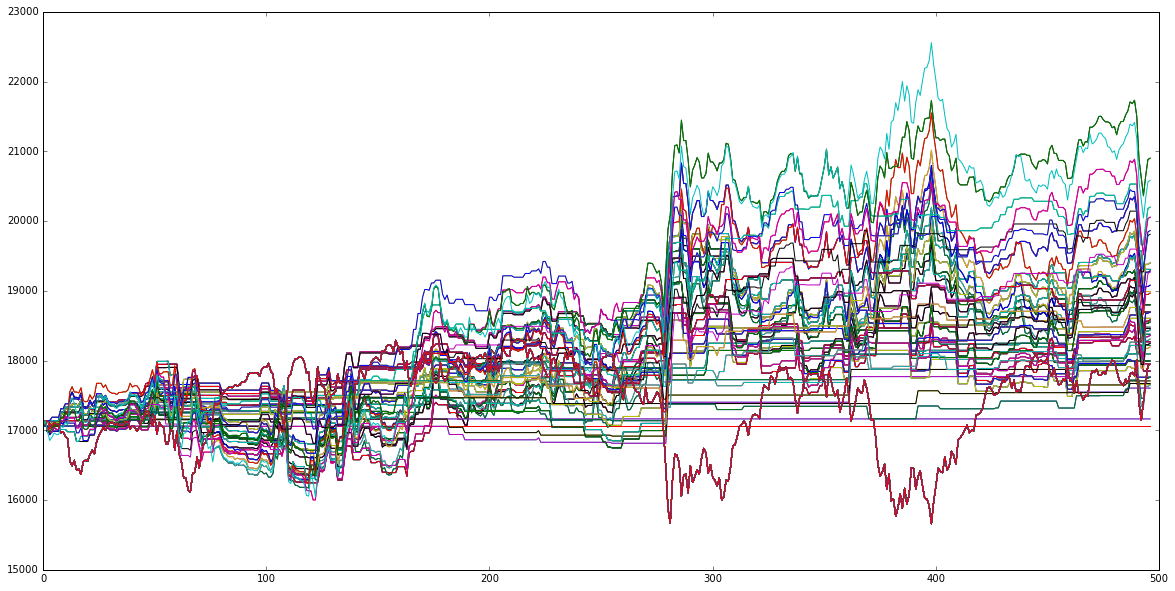

In [534]:
#3. threshold for long short strategy
optlist = pd.DataFrame(index = range(0,55,5), columns = range(0,55,5))
optlist = optlist.fillna(0) 
for i in range(0,55,5):
    for j in range(0,55,5):
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, True)
optlist

Long Short Strategy
sharp ratio of strategy is:  5.59619728072
total returns of strategy is:  0.187699830398
sharp ratio of DJI is:  1.20152627403


5.5961972807200828

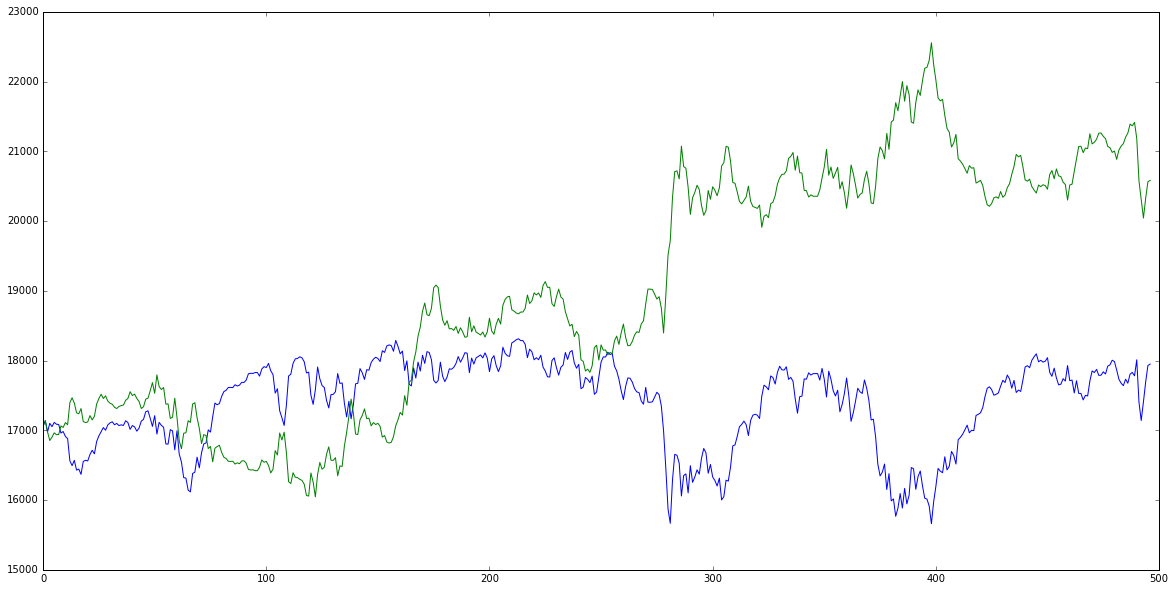

In [530]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, True)

Long Short Strategy
sharp ratio of strategy is:  7.14633678354
total returns of strategy is:  0.203041271335
sharp ratio of DJI is:  1.20152627403


0.00040935740188578897

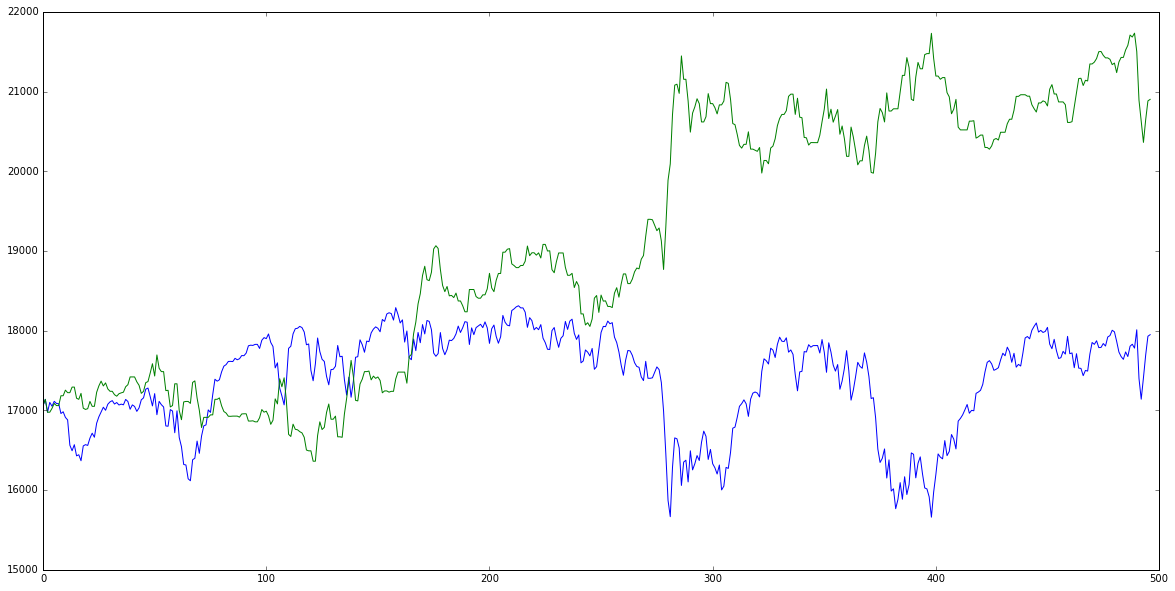

In [535]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 40/100.0, True)